![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


##### Análisis:
La Variable "workingday" que tiene las categorías 1 (es día laboral) y 0 (no es día laboral) esta distribuida 49% y 51% respectivamente en promedio del numero total de rentas.

Los dias laborales se rentan mas bicicletas que los días no laborales.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()
bikes.total.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

In [7]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


##### Análisis:
La Variable "hour"  que indica la hora en que se rentan las ciclas, muestra que las horas de mayor alquiler son las 8am y las 5pm y 6pm. A las 8am en promedio se rentan 362 ciclas, a las 5pm se rentan en promedio 468 y a las 6pm se rentan en promedio 430.

Las horas entre las 3am y 5am son las que menos movimineto de alquiler tienen.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

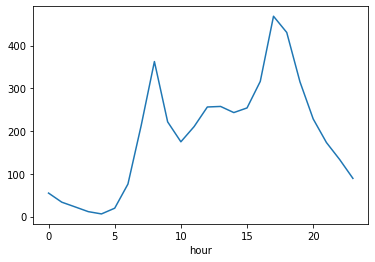

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

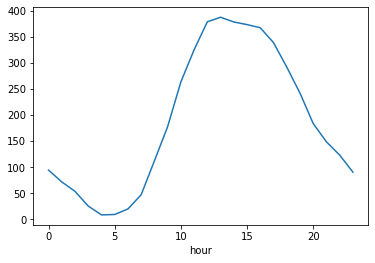

In [9]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

bikes[bikes['workingday']==0].groupby('hour').total.mean().plot()

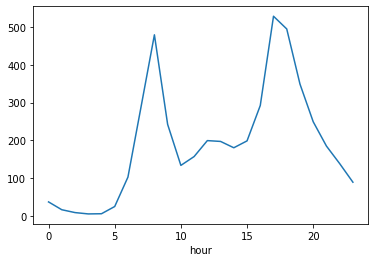

In [10]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes['workingday']==1].groupby('hour').total.mean().plot()

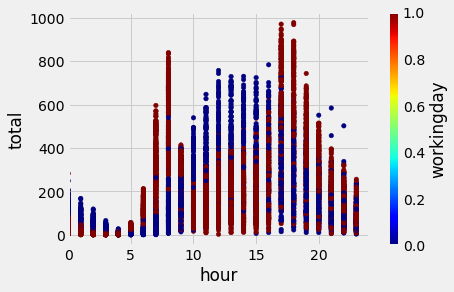

In [11]:
# Gráfica del total, workingday, hour
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
bikes.plot(kind='scatter', x='hour', y='total', c='workingday', colormap='jet', xlim=(0, 24))

In [12]:
bikes.total.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

##### Análisis:
El comportamiento del alquiler de ciclas varia entre si es día laboral o no, pues sus usos son distintos.

En los días laborales se observan picos de alquiler en los horariosn en que la gente se transporta de su casa al trabjo y viceversa.

Por el contrario, en los días no laborales, el comportamiento es más senoidal. A partir de las 5am empieza a crecer el cantidad de rentas de ciclas hasta llegar a su tope máximo hasta la 1pm, y depués empieza a descender el alrquiler de las mismas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [13]:
# Celda 3

#Selecciona las columnas con las que se probará la regresión lineal
x_columns = ['hour','workingday']
y_columns = ['total']

XTrain=bikes[x_columns]
yTrain=bikes[y_columns]

# guardaremos la cantidad de observaciones,en la muestra de entrenamiento, que en este caso es todo el dataset:
datosTrain=len(yTrain)

# Se implementa el modelo de regresión linealy se calculan algunas metricas de desempeño
regAuxiliar = LinearRegression()
regAuxiliar.fit(XTrain, yTrain)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Calcula el R2 del modelo
r2Modelo=regAuxiliar.score(XTrain, yTrain)
r2adjModelo=1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-1)
r2adjModelo

0.16059115011434855

In [15]:
regAuxiliar.score(XTrain, yTrain)

0.16059115011434855

In [16]:
#Muestra los coeficientes de Hour y Workingday
regAuxiliar.coef_

array([[10.49206282,  4.07248627]])

In [17]:
# Muestra el intercepto
regAuxiliar.intercept_

array([67.70595026])

##### Análisis:

El R2 ajustado indica que el modelo no es lo suficiente bueno y no se sjusta a los datos.

Para la intepretacion de los coeficientes, en el caso de la variable Hour, un incremento en 1 hora hara que aumente la renta/alquiler de ciclas en 10.49unidades. Por su parte, para el caso de la variable Workday el hecho que sea un díia laboral (workday=1) hara que el alquiler de ciclas umente 4.07 unidades.

Sin embargo la regresión lineal tiene la limitante en este caso que no reconoce los patrones de comportamiento del alquiler de ciclas en las diferentes horas del día. El decir, no reconoce los altibajos que presenta la variable Total. Así mismo no reconoce las diferencias en el comportamiento (forma de la curva) entre un día laboral y no.

Este modelo, al ser los coeficientes positivos, la regresión va a ser siempre creciente, tal y como lo muestra la siguiente formula:

$$ Y = 67.70595026 + 10.49206282*X_h + 4.07248627*X_w  $$


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [18]:
# Celda 4
# Separación de variables predictoras (X) y variable de interes (y)
X = bikes[x_columns]
y = (bikes.total > 191).astype(int) # salario mayor  191 que es la mediana
X.columns

Index(['hour', 'workingday'], dtype='object')

In [19]:
y

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
                      ..
2012-12-19 19:00:00    1
2012-12-19 20:00:00    1
2012-12-19 21:00:00    0
2012-12-19 22:00:00    0
2012-12-19 23:00:00    0
Name: total, Length: 10886, dtype: int64

In [20]:
# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001

# Definición de la función que calcula el gini index
# Indica que tan buena es la metrica de la partición que ese esta generando
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Indica cual es la ganancia de haber hecho esa partición
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)

{'y_pred': 0,
 'y_prob': 0.400165319617928,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 0.10845540825531091,
 'sl': {'y_pred': 0,
  'y_prob': 0.06868743047830923,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 0.05819371744163647,
  'sl': {'y_pred': 0,
   'y_prob': 0.0038204393505253103,
   'level': 2,
   'split': -1,
   'n_samples': 3139,
   'gain': 4.785361675416124e-05},
  'sr': {'y_pred': 1,
   'y_prob': 0.5164113785557987,
   'level': 2,
   'split': [1, 1.0],
   'n_samples': 455,
   'gain': 0.2363945770764091,
   'sl': {'y_pred': 0,
    'y_prob': 0.02040816326530612,
    'level': 3,
    'split': -1,
    'n_samples': 145,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_prob': 0.75,
    'level': 3,
    'split': -1,
    'n_samples': 310,
    'gain': 0}}},
 'sr': {'y_pred': 1,
  'y_prob': 0.5636139292569236,
  'level': 1,
  'split': [0, 22.0],
  'n_samples': 7292,
  'gain': 0.05722720488024302,
  'sl': {'y_pred': 1,
   'y_prob': 0.627546223754309,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [21]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 10)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

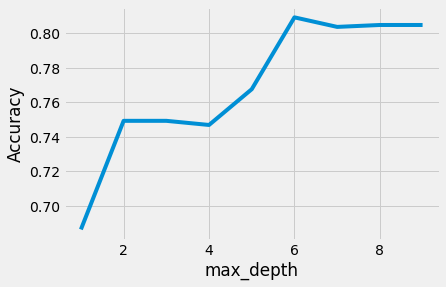

In [22]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [23]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.8090219541673418, 6)

In [24]:
# max_depth=6 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

##### Análisis:

Para este modelo de arbol de decisión con librería, se tiene un accuracy o exactitud de 80.9%, el cual presenta un buen desempeño para el arbol de profundidad 6.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [25]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [26]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [27]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

### Árbol de decisión con librería

In [28]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 10)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

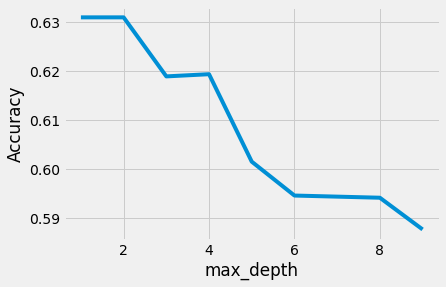

In [29]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [30]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [31]:
# max_depth=6 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

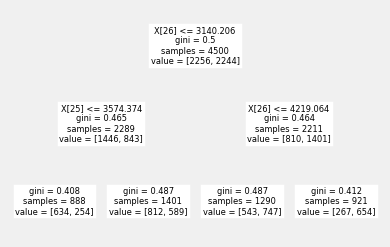

In [32]:
from sklearn.tree import plot_tree
plot_tree(clf,max_depth=2)
plt.show()

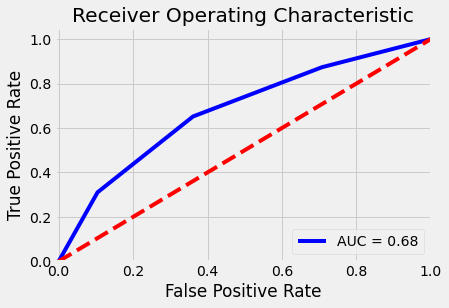

In [33]:
from sklearn import metrics

prediccionTree=clf.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.64580559, 0.64485981])

##### Análisis:

Para este prblema, el modelo de arboles de decicón presenta una exactitud del modelo de 64.5%. Este no es un buen modelo ya que se equivoca en las predicciones un 35.5%.

### Regresión Logística

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clfRegLog= LogisticRegression(random_state=0,max_iter=100)
clfRegLog.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Ahora, procedemos a estimar la clase y las probabilidades de pertenecer a cada clase en los arreglos "prediccionesRegLog" y "prediccionesProbRegLog" respectivamente, como se muestra en el siguiente código:

In [37]:
prediccionesRegLog=clfRegLog.predict(X_test)
prediccionesProbRegLog=clfRegLog.predict_proba(X_test)

In [38]:
y_pred = clfRegLog.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.61731659, 0.61062542])

Luego, calculamos el error de predicción utilizando la siguiente fórmula:

$$Error=\frac{1}{n}\sum_{i=1}^{n}I(y_{i}=\hat{f}(x_{i}))$$

Donde $I(y_{i}=\hat{f}(x_{i}))=1$ si $y_{i}=\hat{f}(x_{i})$ y $I(y_{i}=\hat{f}(x_{i}))=0$ de lo contrario. A continuación se muestra el código que calcula lo anterior para la muestra de test y el modelo de regresión logística:

In [39]:
yTest=y_test.to_numpy()
errorRegLog=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesRegLog[i]):
        errorRegLog+=1/len(yTest)
        
print('El error de clasificación para la regresión logística en la muestra de test es:')
print(errorRegLog)

El error de clasificación para la regresión logística en la muestra de test es:
0.3859999999999979


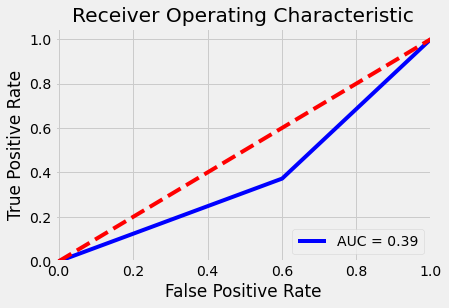

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionesRegLog, pos_label=0)
AUCReg=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCReg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Análisis:

Para este prblema, el modelo de regresión presenta una exactitud del modelo de 39%. Este modelo predice mejor los 0's que los 1's. Sin embargo no presenta un buen desempeño.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

#### Escenario 1: 100 árboles,max_depth = None

In [41]:
# Celda 7

# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

In [42]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6675585284280936, 0.6686666666666666)

#### Escenario 2: 100 árboles,max_depth = 2

In [43]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

In [44]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6335403726708074, 0.646)

#### Escenario 3: 100 regresiones logísticas

In [45]:
clf = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=100), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

In [46]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6128813559322034, 0.6193333333333333)

##### Análisis:

Para este prblema, los modelos de los diferentes escenarios (1, 2 y 3) presentan  una exactitud de 66.75%, 63.35% y 61.2%. Este no es un buen modelo en ninguno de los escenarios sin embargo el escenario 1 pareciera tener un mejor desmpeño respecto a los demás.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

#### Escenario 1: 100 árboles,max_depth = None

In [49]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6675585284280936, 0.6686666666666666)

In [50]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [51]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6715328467153284, 0.67)

#### Escenario 2: 100 árboles,max_depth = 2

In [52]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6335403726708074, 0.646)

In [53]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [54]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6347222222222222, 0.6493333333333333)

#### Escenario 3: 100 regresiones logísticas

In [55]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=100), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6128813559322034, 0.6193333333333333)

In [56]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [57]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6158001350438893, 0.6206666666666667)

##### Análisis:

Para este prblema, los modelos de los diferentes escenarios (1, 2 y 3) presentan  una exactitud de 67.15%, 63.5% y 61.5%. Aunque esto modelos parecieran mejorar respecto a los modleos de votacion mayoritaria, de igual manera su depempeño no es muy bueno.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

##### Análisis:

Para este prblema, tanto los modelos de ensamblaje por votación mayoritaria como los de votación ponderada tuvieron un desempeño muy pobre. En ambos tipo sde modelo el escenario 1 fue el que mejores resultados tuvo con una exactitud de 66.75% para votación mayoritaria y 66.75% para votación ponderada. Este no es un buen desempeño en ninguno de los casos y podría deberse al tipo de problema y de datos , pues los datos parecieran ser poco predecibles. Esto es, tratar de predeciín que notica va a ser tendencia es dificil de predecir.

Sin embrago, las ventajas de los arboles de deción frente a la regresión logistica es que tienden a tener un desempeño o capacidad predictiva mucho mayor. Si el arbol se deja sin una profundidad determinada el modelo tiende a mejorar, pero podría ser dificil de interpretar, Y al establecer una profundidad especifica, se sacrifica un poco el desempeño pero se vuleve más sencillo de interpretar..
